# Explore here

In [1]:
#Dataset Information

# Data Dictionary:
# Pregnancies. Number of pregnancies of the patient (numeric)
# Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
# BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
# SkinThickness. Triceps skinfold thickness (measured in mm) (numeric)
# Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
# BMI. Body mass index (numeric)
# DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
# Age. Age of patient (numeric)
# Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1, positive (numeric)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#------------ PREPROCESING --------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# ----------- MACHINE LEARNING ----------
from xgboost import XGBClassifier
# ----------- METRICS -------------------
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
#------------ OPTIMIZATION --------------
from sklearn.model_selection import GridSearchCV

In [3]:
#Load Data
df_train_raw =  pd.read_csv('../data/raw/clean_train.csv')
df_test_raw =  pd.read_csv('../data/raw/clean_test.csv')

df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                576 non-null    int64  
 1   Pregnancies               576 non-null    int64  
 2   Glucose                   576 non-null    int64  
 3   BloodPressure             576 non-null    int64  
 4   SkinThickness             576 non-null    int64  
 5   Insulin                   576 non-null    int64  
 6   BMI                       576 non-null    float64
 7   DiabetesPedigreeFunction  576 non-null    float64
 8   Age                       576 non-null    int64  
 9   Outcome                   576 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 45.1 KB


In [4]:
df_train_processed = df_train_raw.drop(['Unnamed: 0'], axis=1)
df_test_processed = df_test_raw.drop(['Unnamed: 0'], axis=1)

In [5]:
X_train = df_train_processed.copy().drop(['Outcome'], axis=1)
y_train = df_train_processed['Outcome'].copy()
X_test  = df_test_processed.copy().drop(['Outcome'], axis=1)
y_test  = df_test_processed['Outcome'].copy()

In [6]:
#Al igual que con el Decision Tree, se decide aplicar un standard scaler a los datos
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [7]:
model_xgb = XGBClassifier(random_state = 1750)
model_xgb.fit(X_train_sc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1750, ...)

In [9]:
y_hat_xgb = model_xgb.predict(X_test_sc)
y_hat_xgb

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [10]:
as_xgb = accuracy_score(y_test, y_hat_xgb)

In [11]:
print(f'Accuracy for XGBoost: {as_xgb}')

Accuracy for XGBoost: 0.7239583333333334


In [12]:
#Optimize the Model
XGBClassifier().get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'device', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'multi_strategy', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [16]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'gamma': [3, 5, 7],
    'min_child_weight':[2,4,6],
    'random_state': [1800],
    'n_jobs': [-1]
}

In [17]:
grid = GridSearchCV(model_xgb, param_grid, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1750, ...),
             param_grid={'gamma': [3, 5, 7], 'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [2, 4, 6],
                         'n_estimators': [100, 200, 300, 400], 'n_jobs': [-1],
                         'random_state': [1800]},
             scoring='accuracy')

In [18]:
grid.fit(X_train_sc, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1750, ...),
             param_grid={'gamma': [3, 5, 7], 'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [2, 4, 6],
                         'n_estimators': [100, 200, 300, 400], 'n_jobs': [-1],
                         'random_state': [1800]},
             scoring='accuracy')

In [19]:
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'gamma': 7, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 1800}


In [20]:
model_grid = XGBClassifier(gamma= 7, max_depth= 4, min_child_weight= 6, n_estimators= 100, n_jobs= -1,random_state= 1800)
model_grid.fit(X_train_sc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=7, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=1800, ...)

In [21]:
y_hat_model_grid = model_grid.predict(X_test_sc)

In [22]:
ac_model_grid = accuracy_score(y_test,y_hat_model_grid)

In [23]:
print(f'Accuracy XGBoost with Hyperparams: {ac_model_grid}')

Accuracy XGBoost with Hyperparams: 0.7604166666666666


In [24]:
import pickle
file_name = '../models/xgboostclasifier1800.pkl'
pickle.dump(y_hat_model_grid, open(file_name, 'wb'))

In [32]:
#Compare the 3 models

cm = sns.light_palette('red', as_cmap=True)

model_compare = pd.DataFrame({'model_name': ['decisition tree', 'random forest', 'xgboost'], 'Accuracy': [0.765625, 0.78125, 0.76041]})

model_compare.style.background_gradient(cmap=cm)


,model_name,Accuracy
0,decisition tree,0.765625
1,random forest,0.781250
2,xgboost,0.760410


In [ ]:
#El modelo de random Forest con el ajuste de los hyper parametros es el que ofrece el mejor accuracy. 

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       125
           1       0.69      0.57      0.62        67

    accuracy                           0.76       192
   macro avg       0.74      0.72      0.72       192
weighted avg       0.75      0.76      0.75       192



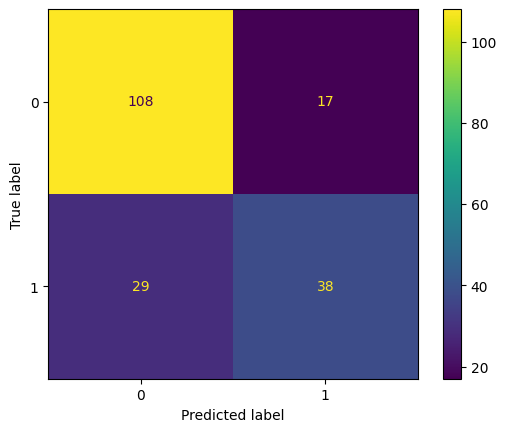

In [36]:
print(classification_report(y_test,y_hat_model_grid))

cm = confusion_matrix(y_test, y_hat_model_grid)

ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=model_grid.classes_
                       ).plot()
plt.show()

In [37]:
# La clase 0 obtuvo los mejores resultados en la prediccion.